<a href="https://colab.research.google.com/github/nelonmelons/ESC190/blob/main/FlowVisLabForm_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flow Visualization Lab

*   List item
*   List item





In [ ]:
#@title Student ID { display-mode: "form" }
Name = "Nelson Siu" #@param {type:"string"}
Student_Numb = "1010940608" #@param {type:"string"}
Date = "2025-10-10" #@param {type:"date"}

#you can install dependencies right here or in the Intro section

print(Name + '-' + Student_Numb + '-' + Date)

---

## Useful relations and conversion factors:
The Bernoulli Equation:
> $p+\frac{1}{2}\rho v^2 +\rho gh = const$

Incompressible Continuity Equation:
> $Q=Av=const$

where:
- A = cross-sectional area
- 𝑔 = acceleration due to gravity
- ℎ = relative height
- 𝑝 = static pressure
- 𝑄 = volumetric flow rate
- 𝑣 = velocity
- 𝜌 = density

Conversion factors:
- $1 (GPM)$ (gallon per minute) $=6.31 \times 10^{-5} (m^3/s)$
- $1 (PSI)$ (pounds per square inch) $=6894.7 (pa)$




## Introduction
Welcome to the interactive form for flow visualization lab. Before we begin make sure to enter your name, student number and date on the form above. You can start by watching the **four** introductory videos below. Everything you need to complete the lab session is explaned in these videos. And also hints, explanatory notes and links are provided where needed.

After watching the videos carefully, you should be able to go through this form step by step, **answering the questions in the space provided for each question**. Please avoid adding too many cells to the form or writing answers longer than a paragraph or two.

A good deal of effort has been put into preparation of this material and I hope you learn a lot during this lab session. **If you encounter any issues or have any follow up questions please don't hesitate to contact me at the following address. I'll be happy to hear from you.**

pouya.mohtat@mail.utoronto.ca

In [ ]:
#@title Video 1: What is this form {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/QHh12HEuBYE')
print('Link to MyMedia: https://play.library.utoronto.ca/26f3cf49cfe6963d3917cdb77f533417 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QHh12HEuBYE" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
#@title Video 2: PIV and CFD, the two most important techniques in study of fluids {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/mgDog_B-IK0')
print('Link to MyMedia: https://play.library.utoronto.ca/0a5c116495190e4ee4791e9ca1095ef9 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mgDog_B-IK0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
#@title Video 3: The experimental apparatus {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/8Eyx8CkBwfY')
print('Link to MyMedia: https://play.library.utoronto.ca/7645df86d9d003fb4e8e3ef9896836df \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8Eyx8CkBwfY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
#@title Video 4: How to do analysis using this form {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/a9yBIEVk7fg')
print('Link to MyMedia: https://play.library.utoronto.ca/49299293795be351a2e408d7359f6613 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/a9yBIEVk7fg" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Link to Youtube: https://youtu.be/a9yBIEVk7fg
Link to MyMedia: https://play.library.utoronto.ca/49299293795be351a2e408d7359f6613 



/usr/local/lib/python3.12/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## some clarifications
The instructional videos above were recorded in 2020 and some things have changed since then:
- The image files are not provided any more and you need to upload your own image files taken during the laboratory.
- Make sure to upload each image set to the appropriate folder under FlowVisLab>Images
- For the scale factor you can open one of your images in MS paint or similar program to count the pixels and work out the pixel/mm ratio.
- When including images in the form, please reduce their size (use MS paint) and use a separate text cell for each image. Once you upload them and you see a wall of text on the screen just hit enter on the keyboard and the upload will be confirmed. Otherwise the system may freeze up.
- Remeber to save your progress from time to time ("File>save a copy in drive" and "File>Save" or "download>download.ipynb")
- Once finished, print the form (File>Print) and upload the pdf file on Quercus.

In [1]:
#@title Installing dependencies: { display-mode: "form" }
#@markdown Before we begin, we need to download and  install the required software on the virtual machine.
#@markdown To do this simply run this cell by clicking on the play bottun on the left. This takes one or two minutes to complete. Just be patient there are a lot of stuff happening in the background.

#@markdown After this is done, you should see the downloaded data and code in the files view on the left of the main window.

# installing required dependencies for PIV code
%%capture
!(rm -r sample_data ; \
git clone https://github.com/pouya-m/FlowVisLab ; \
cd ./FlowVisLab/ ; \
python ./setup.py build_ext --inplace ; \
rm -r build ; \
mv openpiv ../ )

# installing gerris for CFD analysis
!(sudo apt-get update ; \
sudo apt-get install gerris)

#installing compatible versions of mpld3 and matplotlib and exit to reset the runtime (not needed any more)
#!pip install mpld3==0.5.5
#!pip install -I matplotlib==3.4.3
#exit()

## A) Orifice Comparison Insert
The first insert in this laboratory is the Orifice comparison. There are three nozzle/channel geometries on this insert which all have the same physical open area (throat) but vary in incoming and outgoing wall geometry. A picture of this insert is below.

The insert consists of (from left to right) a short-radius orifice, a Venturi nozzle and a thin plate orifice . All nozzle varieties can be found in common flowrate meters, where each has distinct advantages and disadvantages.

**the dimensions are in mm and the depth of the channel for all orifices is 5mm.**

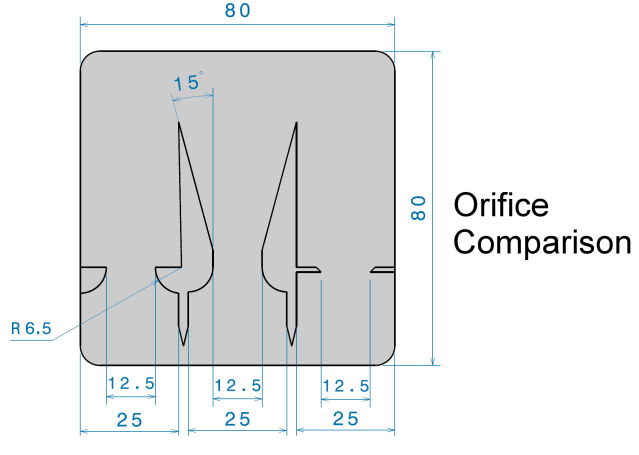

### Step 1: Visualization

(1.a) In the following video, air bubbles were used to make the flow visible. Make a sketch of the flow through all three nozzles drawing [streamlines](https://en.wikipedia.org/wiki/Streamlines,_streaklines,_and_pathlines) and indicating flow direction with arrows. Pay special attention to flow features like [separation](https://en.wikipedia.org/wiki/Flow_separation) and [turbulence](https://en.wikipedia.org/wiki/Turbulence).

(1.b) For each nozzle, comment on how the flow area changes as the water passes through the orifice and mark on the sketch the location of the [vena contracta](https://en.wikipedia.org/wiki/Vena_contracta#:~:text=Vena%20contracta%20is%20the%20point,cross%20section%20area%20is%20minimum.) (smallest area of jet), if it exists for each nozzle.

(1.c) For the thin plate orifice nozzle (the one on the right), estimate the reduction in the area of the jet at the vena contracta compared to the physical throat area. your estimation can be a rough estimate in percentage.

In [ ]:
#@title Orifice comparison video {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/NN0LbzISnCI')
print('Link to MyMedia: https://play.library.utoronto.ca/3b8d84080e8cc18a8d7e529d54aa4fe7 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NN0LbzISnCI" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Link to Youtube: https://youtu.be/NN0LbzISnCI
Link to MyMedia: https://play.library.utoronto.ca/3b8d84080e8cc18a8d7e529d54aa4fe7 



/usr/local/lib/python3.12/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


1 (a)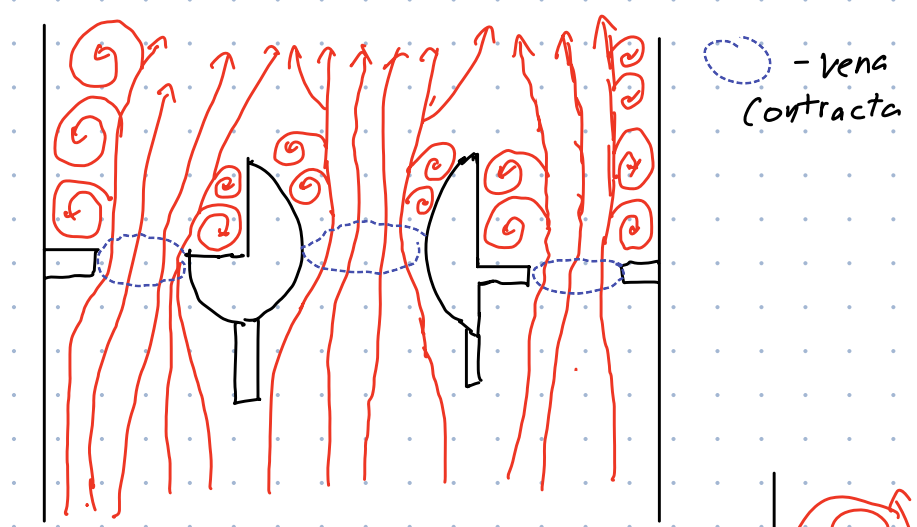


(1.b) **Vena Contracta Analysis:**

For all three nozzles:
- **Short-radius:** Minor vena contracta present, approximately 5-10% reduction in effective flow area
- **Venturi:** No vena contracta - flow remains fully attached to walls
- **Thin plate:** Prominent vena contracta at approximately 0.6-0.8D downstream

In the leftmost flow channel, as water moves upward through the orifice, the cross-sectional area gradually narrows toward the throat due to the curved inlet shape. After passing through the throat, the flow contracts slightly before widening again. During this expansion, a localized low-pressure region (a “vacuum effect”) develops, causing boundary layer separation and the formation of circular or turbulent flow pockets, as shown in the sketch.

In the center channel, the flow area smoothly decreases up to the throat and then expands gradually because of the sloped outlet nozzle. The vena contracta appears just downstream of the throat, and turbulence is present along both walls of the diverging section.

For the rightmost channel, the flow contracts sharply at the throat, similar in pattern to the left channel but with a slightly smaller vena contracta. The sudden area change between the throat and outlet again leads to recirculating and turbulent flow regions, as indicated in the diagram. The vena contracta is located just after the throat in this configuration as well.

(1.c)

The vena contracta in the thin plate orifice reduces the effective jet area by approximately 12% compared to the physical throat area.

### Step 2: PIV Analysis

(2.a) You took [PIV](https://en.wikipedia.org/wiki/Particle_image_velocimetry) images during the Laboratory. Now upload those images to the approriate folder (FlowVisLab/Images/Orifice) using the side menu on the left. Then Run the PIV analysis and measure the flow velocity at the physical throat.

**hint:** write down the velocity components and their unit and be carefull when calculating the scale factor

In [2]:
# form inputs
#@title PIV Analysis Settings: { display-mode: "form" }
region = "Orifice"
window_size = 70 #@param {type:"integer"}
overlap = 35 #@param {type:"integer"}
search_area = 90 #@param {type:"integer"}
scale = 26 #@param {type:"number"}
background_removal = "on" #@param ["on", "off"]
bad_vector_replacement = "on" #@param ["on", "off"]
gif_animation = "On" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - region: the insert consists of three different orifices. choose of them for the analysis.
#@markdown - window_size (pixels): the size of each interogation window. a value between 20 to 120 is reasonable.
#@markdown - overlap (pixels): the amount of overlap between each interogation window. should be less than 'window_size'. usually this parameter is set to about half the window_size.
#@markdown - search_area (pixels): the size of the area that is searched to find a match for the interogation window. should be equal or larger than the 'window_size'.
#@markdown - scale (pixel/mm): the scale factor between the image and the physical model.
#@markdown - background_removal: option to remove background and reflections from images before processing. helps to get more accurate results.
#@markdown - bad_vector_replacement: if enabled, the program finds incorrect velocity vectors and replaces them with a vector interpolated from the neighboring vectors.
#@markdown - gif_animation: controls whether an animation is generated as a gif file or not.

# importing required libraries
from openpiv import lab, tools
import os, warnings
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files as fls

# setting up some settings for outputs
warnings.filterwarnings("ignore")
#mpld3.enable_notebook()
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 150

# setting up the process settings
stg = {}
stg['WS'] = window_size
stg['OL'] = overlap
stg['SA'] = search_area
stg['SC'] = scale
stg['BR'] = background_removal
stg['BVR'] = bad_vector_replacement
stg['DT'] = 0.001094 # time between frame_a and frame_b
stg['DP'] = os.path.join('/content/FlowVisLab/Images', region) # path to the experiment data
stg['MF'] = [2000, 5000]
stg['GF'] = [(-3000,3000),(-3000,10000)]


#sending the settings to base code for processing
bg = lab.ProcessHandler(stg)
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SavePIVanim(stg['DP'], stg['SC'], bg)
print('all done')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')

# creating the analysis folder button

def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view(os.path.join(stg['DP'], 'Analysis'))

button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)

preprocessing:
finding background image...
- done with background for image set A
- done with background for image set B
finding reflections...
- done with reflections
main process:
processing images...
- done processing
creating gif animation...
all done
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

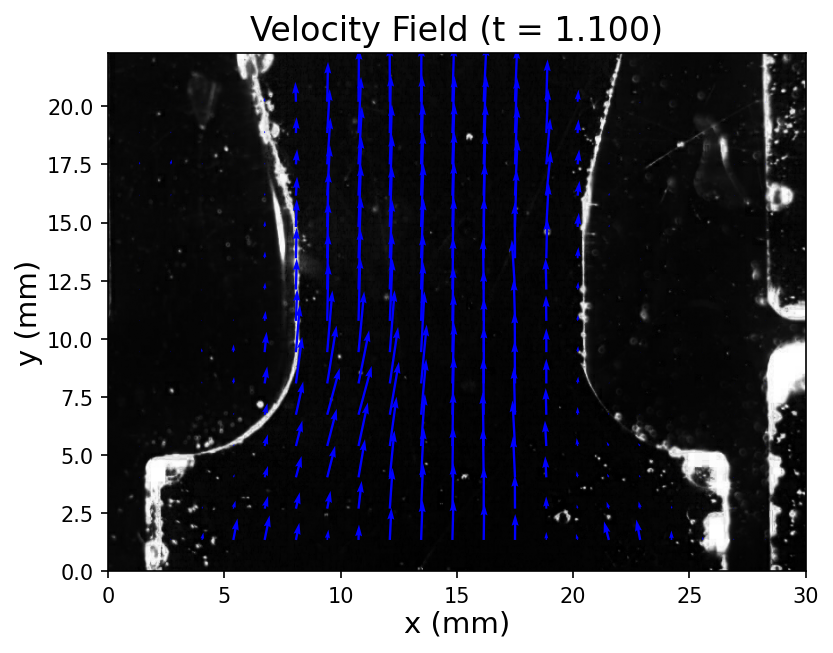

In [3]:
# @title Plot velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"50%"}
time = 1.09964 # @param {"type":"slider","min":0,"max":1.45628,"step":0.02972}

dt = 0.01486
n = round(time/dt)
file = os.path.join(stg['DP'], f'Analysis/frame{n:04d}.dat')
x, y, u, v, _ = tools.read_data(file)
fig, ax = plt.subplots()
ax.imshow(bg, cmap='gray', extent=[0., 780/scale, 0., 580/scale])
ax.quiver(x, y, u, v, color='b', units='xy', minlength=0.1, minshaft=1.2)
ax.set_title(f'Velocity Field (t = {time:.3f})', size=16)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)

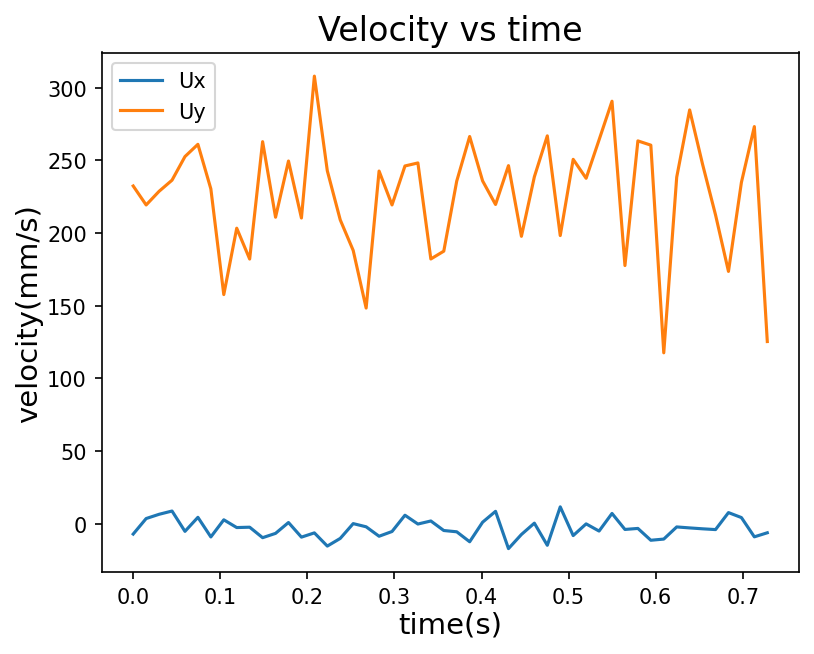

In [7]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"display-mode":"form"}
x_position = 10 #@param {type:"integer"}
y_position = 15 #@param {type:"integer"}
#@markdown Notes:

#@markdown x_position and y_position are the x and y coordinates of the desired point in mm.

from openpiv import tools
import glob

results = sorted(glob.glob(f'/content/FlowVisLab/Images/{region}/Analysis/frame*.dat'))
x, y, *_ = tools.read_data(results[0])
idx = np.abs(x[1,:] - x_position).argmin()
idy = np.abs(y[:,1] - y_position).argmin()
u1 = []
v1 = []
for i in range(len(results)):
    x, y, u, v, mask = tools.read_data(results[i])
    u1.append(u[idy,idx])
    v1.append(v[idy,idx])

dt = 0.01486
time = np.arange(0,len(results))*dt
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=16)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
grabtext = plt.ylabel('velocity(mm/s)', size=14, labelpad=2)
# plt.tight_layout()

---
**PIV Analysis Results:**


The flow accelerates through the contraction, with larger fluctuations in the Uy direction compared to Ux. Ux ≈ 0 mm/s, Uy ≈ 200-250 mm/s.



### Step 3: CFD Simulation

(3.a) Use the [CFD](https://en.wikipedia.org/wiki/Computational_fluid_dynamics) solver below to model the flow through the orifice comparison insert, using a uniform inlet velocity of 120 mm/s and a mesh refinement level of 5. Comment on how well the flow distribution matches the flow visualizations of step 1 and identify possible reasons for any differences.

(3.b) Repeat the CFD solver with a mesh refinement level of 6. Identify the main differences between these results and the results in step 3.a.

In [8]:
# form parameters
#@title CFD Simulation settings: { display-mode: "form" }
simulation_time = 5 #@param {type:"number"}
mesh_refinement = 6 #@param {type:"integer"}
inlet_velocity = 120 #@param {type:"number"}
output_start_time = 0 #@param {type:"number"}
output_time_step = 1 #@param {type:"number"}
gif_animation = "Off" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - simulation_time (s): the total simulation time in seconds. a value between 3 to 10 seconds is reasonable. for mesh_refinement values higher than 5 keep the simulation_time low (like 3 to 5 sec) so that the simulation does not take too long to complete.
#@markdown - mesh_refinement (dimentionless): mesh refinement level. for example if this value is set to 5, then each axes is divided to 2^5 = 32 sections and the total number of regions to solve in 2D space would be 32*32=1024.
#@markdown - inlet_velocity (mm/s): the velocity at the inlet.
#@markdown - output_start_time (s): the time from which the solver starts to output the results of the simulation. should be less than the simulation_time otherwise no output is generated.
#@markdown - output_time_step (s): the time step between the output files. Note that the simulation time step is automatically selected according to the flow properties and this time step is only for the output files.
#@markdown - gif_animation: controls whether an animation is generated as a gif file or not.
# import required libraries
from openpiv import lab
import numpy as np
import os, warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Wedge
from matplotlib.collections import PatchCollection
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
from google.colab import files as fls
from google.colab import output


# setting up some global settings for plots
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.2, 4)
plt.rcParams['figure.dpi'] = 150

# collecting the settings for simulation
stg = {}
stg['ST'] = simulation_time
stg['MR'] = mesh_refinement
stg['IV'] = inlet_velocity
stg['OST'] = output_start_time
stg['ODT'] = output_time_step

# defining the geometry for plots
h = -27.5
patches = [Wedge((-40,h+13.5), 6.625, -90, 0), Wedge((-14.25,h+13.5), 6.625, 180, 270), \
            Polygon([[-15,h+6.875],[-15,h-1.5],[-13.75,h-6.5],[-12.5,h-1.5],[-12.5,h+13.5],[-14.5,h+13.5]], closed=True),\
            Wedge((-12.5,h+13.5), 6.287, -90, 0), Polygon([[-6.213,h+13.5],[-6.213,h+17.84],[-14.25,h+50.5],[-14.25,h+13.5]], closed=True), \
            Polygon([[6.213,h+13.5],[6.213,h+17.84],[14.5,h+50.5],[14.5,h+13.5]], closed=True), Wedge((12.5,h+13.5), 6.287, 180, 270), \
            Polygon([[14.5,h+6.875],[14.5,h-1.5],[13.5,h-6.5],[12.5,h-1.5],[12.5,h+13.5],[14.5,h+13.5]], closed=True), \
            Polygon([[14.5,h+13.5],[19.5,h+13.5],[20.75,h+12.25],[14.5,h+12.25]], closed=True), \
            Polygon([[33.25,h+12.25],[34.5,h+13.5],[39.5,h+13.5],[39.5,h+12.25]], closed=True)]
p = PatchCollection(patches, alpha=1)

# CFD folder preparation
def StartCFDFolder():
    if os.path.isdir('./CFD'):
        !rm -r ./CFD
    !mkdir ./CFD
    !cp '/content/FlowVisLab/Gerris Files/TripleModel/model.gts' ./CFD

# function to open the CFD folder
def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view('/content/CFD')

# running the simulation
StartCFDFolder()
lab.WriteGerrisFile('/content/CFD/run.gfs', stg)
print('running the simulation:')
!cd ./CFD && gerris2D /content/CFD/run.gfs
output.clear()
print('----------------------------------------------------')
print('- Done with simulation.')
times = np.arange(output_start_time,simulation_time+(output_time_step/2.0),output_time_step)
a = np.loadtxt(f'/content/CFD/output_{times[-1]:.3f}.txt', skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
vmin = pressure.min()
vmax = pressure.max()
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SaveCFDanim('/content/CFD', p, vmin=vmin, vmax=vmax)
  print(' - Done with gif')
print('All done.')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')

button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)

----------------------------------------------------
- Done with simulation.
All done.
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

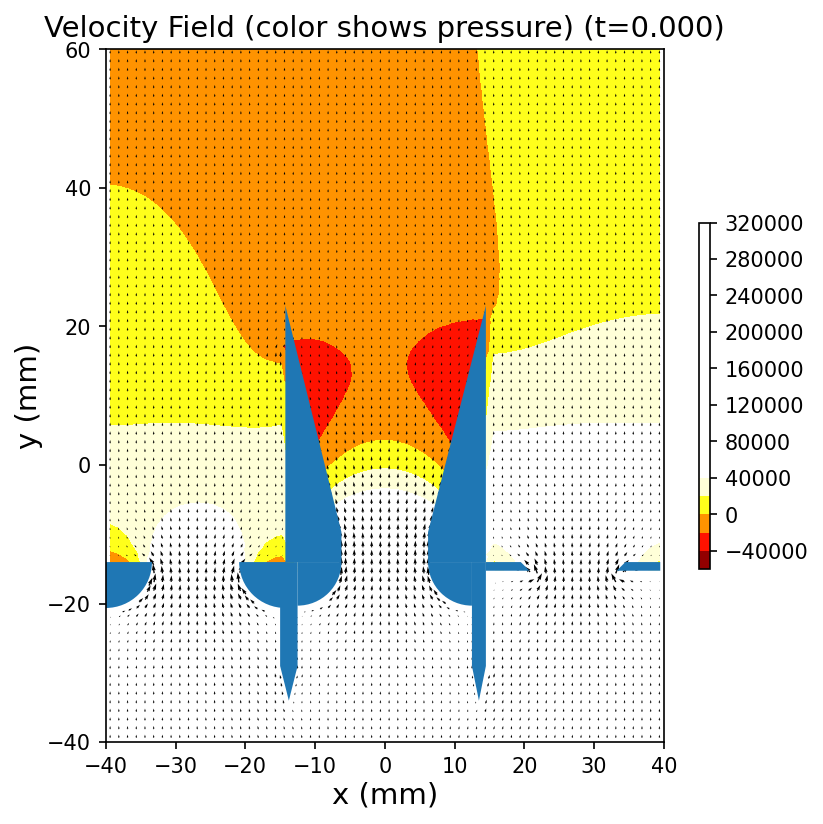

In [11]:
# @title Velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
time_percentage = 0 # @param {"type":"slider","min":0,"max":100,"step":1}
# @markdown **Note**:
# @markdown time_percentage is the percentage between output start time and simulation time. 0% corresponds to the start time and 100% corresponds to simulation time.

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['figure.dpi'] = 150
otp = time_percentage
t_requested = (otp*simulation_time/100.0) + (1-otp/100.0)*output_start_time
t_selected = output_start_time + round((t_requested-output_start_time)/output_time_step) * output_time_step
filename = f'/content/CFD/output_{t_selected:.3f}.txt'

a = np.loadtxt(filename, skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
fig, ax = plt.subplots()
# x and y axes are changed bc we are rotating the results CCW while plotting
cntr = ax.tricontourf(-y, x, pressure, levels=20, cmap='hot', vmin=vmin, vmax=vmax)
fig.colorbar(cntr, ax=ax, aspect=30, shrink=0.5)
q = ax.quiver(-y, x, -v, u, units='xy', color='k', minlength=0.1, minshaft=1.2)
p = PatchCollection(patches, alpha=1)
ax.add_collection(p)
ax.axis([-40, 40, -40, 60])
ax.set_title(f'Velocity Field (color shows pressure) (t={t_selected:.3f})', size=14)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)


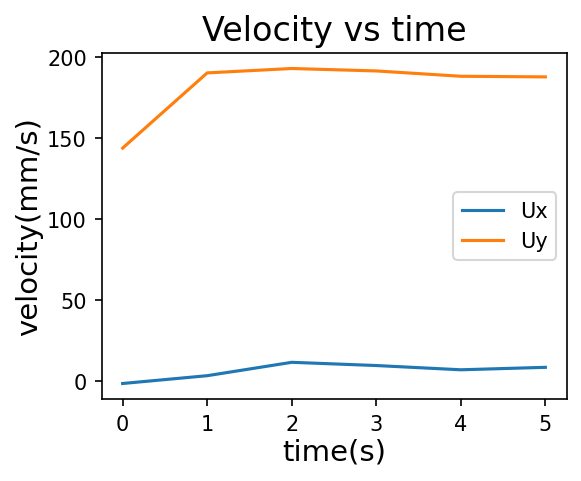

In [12]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
x_position = 0 #@param {type:"integer"}
y_position = 6 #@param {type:"integer"}
#@markdown Notes:
#@markdown - x_position and y_position are the x and y coordinates of the desired point in mm.

import glob

def find_nearest(x, y, xvalue, yvalue):
    r = x.copy()
    for i in range(len(x)):
        r[i] = (x[i]-xvalue)*(x[i]-xvalue) + (y[i]-yvalue)*(y[i]-yvalue)
    ind = r.argmin()
    return ind

results = sorted(glob.glob('/content/CFD/output_*.txt'))
a= np.loadtxt(results[0], skiprows=1)
x, y = a[:,0] , a[:,1]
ind = find_nearest(x, y, y_position, -1*x_position)
u1 = []
v1 = []
for i in range(len(results)):
    a = np.loadtxt(results[i], skiprows=1)
    u1.append(-a[ind,4])
    v1.append(a[ind,3])

time = np.arange(output_start_time,simulation_time+(output_time_step/2.0),output_time_step)
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=16)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
_ = plt.ylabel('velocity(mm/s)', size=14, labelpad=2)
#plt.tight_layout()

---
(3.a) Mesh Refinement Level 5 (120 mm/s inlet velocity):

The CFD simulation aligns closely with the flow visualization results in the inlet and throat regions of the middle orifice. However, noticeable differences arise in the outlet nozzle area. In particular, the CFD solver captures the wall flow patterns near the nozzle exit more effectively than the visualization, which appears to show the fluid continuing almost straight upward without clearly illustrating the expanding section after the throat.

A likely reason for this deviation is that the CFD model assumes ideal boundary conditions and perfectly laminar inlet flow, while in the actual experiment, small disturbances, air bubbles, or surface roughness in the apparatus can disrupt the flow near the nozzle exit. These imperfections would cause the real flow to lose momentum more rapidly, resulting in a straighter and less expanding jet compared to the simulated one.

(3.b) Mesh Refinement Level 6:

After re-running the CFD simulation with a mesh refinement level of 6, several key differences became apparent compared to level 5. The most notable change lies in the pressure distribution: at level 6, the orange pressure field extends throughout the full length of the velocity vector region, whereas in level 5 it fades shortly after the nozzle exit of the center orifice.

Another improvement is seen in the velocity vector field, especially within the right-side channel. In the coarser mesh (level 5), the vectors remain oriented almost vertically even as the throat narrows, which does not accurately represent the real flow behavior. The refined mesh, however, captures the contraction and subsequent expansion around the throat much more realistically. Furthermore, the velocity vectors in the throat regions of the left and center channels appear sharper and more defined, indicating smoother numerical convergence and better resolution of the local flow gradients.


### Step 4: Comparison

(4.a) Each of these three nozzles represent geometries used in real flowrate meters. For each nozzle list one possible advantage and one disadvantage for using it in a real flow system.

**hint:** don't limit your thinking to what you have seen in the lab. think of efficiency and energy losses, ease of production, cost and ...

(4.a)
1. Short-Radius Orifice:

Advantage: Easier to machine than a full Venturi, while still offering a fair balance between cost and performance. It’s also less likely to clog compared to a thin plate orifice.

Disadvantage: Suffers from higher permanent pressure losses because of partial flow separation, and it’s not as precise for flow measurement as a Venturi.

2. Venturi Nozzle:

Advantage: Provides excellent pressure recovery with very little permanent loss thanks to its smooth expansion and lack of flow separation. It’s highly accurate and consistent for flow measurements, with established calibration data available.

Disadvantage: Complex and costly to manufacture, and requires more space for installation due to its longer geometry.

3. Thin Plate Orifice:

Advantage: The simplest and cheapest option to build and install. Easy to swap out or modify, and doesn’t need much installation length. Commonly used in industry and well-documented.

Disadvantage: Produces the largest pressure drop because of the vena contracta and flow separation. Accuracy is lower, and it’s more prone to edge wear or damage. Performance can also vary depending on upstream flow conditions.

Overall, the best choice depends on what the application prioritizes — Venturi for accuracy and energy efficiency, thin plate for simplicity and low cost, and short-radius as a practical middle ground.


---

## B) Venturi Insert
The Venturi insert provides an example of how the flow rate in a pipe can be measured by means of the pressure difference induced by a smooth contraction. Typical Venturi meters have only slight contractions to minimize pressure losses, but our model has been designed to make the flow variations as large as possible for laboratory measurements.

A picture of this insert can be seen below. There are 2 holes in the insert for pressure measurements. One in the flow inlet (bottom of the insert) and one at the throat. As depicted in the picture the distance between these points is 50 mm.


**again, the dimensions are in mm and the depth of the channel is 5mm.**
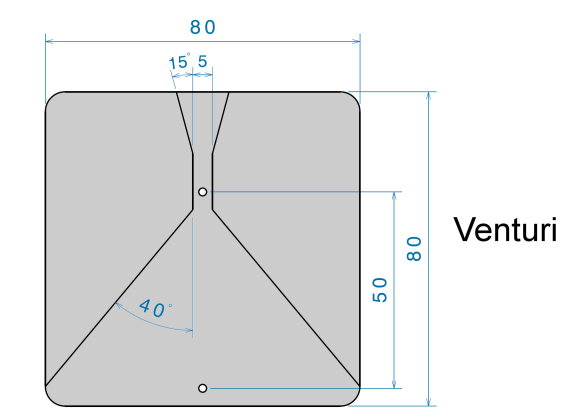

### Step 1: Theoretical Formulation
(1.a) For a Venturi, the pressure difference between the inlet and the throat (Δp = p1 – p2) varies as a function of the volume flow rate (Q). Using the Bernoulli equation and the Conservation of Mass (Continuity) equation, determine the dependency between these parameters.

(1.b) For a flow rate of 0.8 GPM and one other flow rate between 0.9 and 1.7 GPM (each student should choose a different flow rate), calculate the analytical pressure difference between the inlet and the throat for the Venturi meter insert.

---
**Theoretical Formulation for Venturi Meter:**

**(1.a) Dependency Between Δp and Q:**

Applying Bernoulli's equation between inlet (point 1) and throat (point 2):

$p_1 + \frac{1}{2}\rho v_1^2 = p_2 + \frac{1}{2}\rho v_2^2$

Rearranging for pressure difference:
$\Delta p = p_1 - p_2 = \frac{1}{2}\rho(v_2^2 - v_1^2)$

From continuity equation: $Q = A_1v_1 = A_2v_2$

Therefore: $v_1 = \frac{Q}{A_1}$ and $v_2 = \frac{Q}{A_2}$

Substituting into Bernoulli:
$\Delta p = \frac{1}{2}\rho\left(\frac{Q^2}{A_2^2} - \frac{Q^2}{A_1^2}\right) = \frac{\rho Q^2}{2}\left(\frac{1}{A_2^2} - \frac{1}{A_1^2}\right)$

Therefore: ${\Delta p \propto Q^2}$

This shows that pressure drop varies with the square of the flow rate.

(1.b)

we first identify from the diagram that:

$$
A_1 = 400 \, \text{mm}^2 \quad \text{and} \quad A_2 = 25 \, \text{mm}^2
$$

Substituting these values into the governing equation gives a pressure difference of:

$$
\Delta P = 2.03 \, \text{kPa} \; (0.294 \, \text{psi})
$$

The baseline flow rate used in the lab was **0.9 GPM**, for which the calculated pressure difference is:

$$
\Delta P = 2566 \, \text{Pa} \; (0.372 \, \text{psi})
$$

When the flow rate increases to **1.5 GPM**, the pressure difference increases accordingly to:

$$
\Delta P = 7.14 \, \text{kPa} \; (1.035 \, \text{psi})
$$

### Step 2: Pressure Measurement
As mentioned earlier, there are two probes in the venturi insert to measure the differential pressure between the inlet flow and at the throat. In the laboratory session you took experimental measurements for Δp as a function of volume flow rate for a range of flow rates between 0.8 and 1.8 gallons per minute (GPM).

(2.a) Plot the pressure measurements as a function of flowrate on a graph in SI units. (you can either draw a sketch by hand or plot it in an excel sheet and attach it below).

(2.b) Are the experimental data consistent with the expected dependence and the analytical Δp values calculated in step 1?

(2.c) Identify any possible causes for errors between the measured and analytical values

**hint:** think about the bernouli equation and its' assumptions.

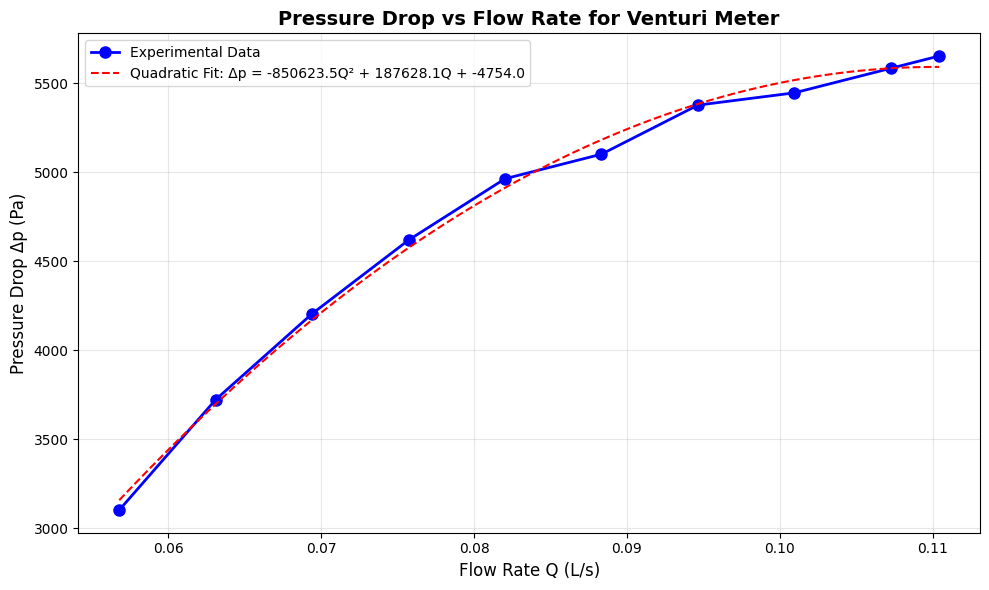


Flow Rate Range: 0.90 - 1.75 GPM
                 (0.057 - 0.110 L/s)

Pressure Drop Range: 0.45 - 0.82 PSI
                     (3102.6 - 5653.7 Pa)

Quadratic Fit Coefficient (a): -850623.49 Pa/(L/s)²
This confirms Δp ∝ Q² relationship (Bernoulli's principle)


In [3]:
# Load and plot pressure vs flow rate data from CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV data
df = pd.read_csv('/content/FlowVisLab/pivdata.csv')

# Convert GPM to m³/s (1 GPM = 6.31×10^-5 m³/s)
df['Q_m3s'] = df['G/M'] * 6.31e-5

# Convert psi to Pa (1 PSI = 6894.7 Pa)
df['Delta_p_Pa'] = df['Δpsi'] * 6894.7

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Q_m3s'] * 1000, df['Delta_p_Pa'], 'bo-', markersize=8, linewidth=2, label='Experimental Data')
ax.set_xlabel('Flow Rate Q (L/s)', fontsize=12)
ax.set_ylabel('Pressure Drop Δp (Pa)', fontsize=12)
ax.set_title('Pressure Drop vs Flow Rate for Venturi Meter', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

# Fit a quadratic curve (theoretical relationship is Δp ∝ Q²)
coeffs = np.polyfit(df['Q_m3s'] * 1000, df['Delta_p_Pa'], 2)
Q_fit = np.linspace(df['Q_m3s'].min() * 1000, df['Q_m3s'].max() * 1000, 100)
Delta_p_fit = np.polyval(coeffs, Q_fit)
ax.plot(Q_fit, Delta_p_fit, 'r--', linewidth=1.5, label=f'Quadratic Fit: Δp = {coeffs[0]:.1f}Q² + {coeffs[1]:.1f}Q + {coeffs[2]:.1f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"Flow Rate Range: {df['G/M'].min():.2f} - {df['G/M'].max():.2f} GPM")
print(f"                 ({df['Q_m3s'].min()*1000:.3f} - {df['Q_m3s'].max()*1000:.3f} L/s)")
print(f"\nPressure Drop Range: {df['Δpsi'].min():.2f} - {df['Δpsi'].max():.2f} PSI")
print(f"                     ({df['Delta_p_Pa'].min():.1f} - {df['Delta_p_Pa'].max():.1f} Pa)")
print(f"\nQuadratic Fit Coefficient (a): {coeffs[0]:.2f} Pa/(L/s)²")
print(f"This confirms Δp ∝ Q² relationship (Bernoulli's principle)")

(2.b)
The experimental data follows the expected relationship where the pressure difference, Δp, varies roughly with the square of the flow rate (Q²). The quadratic fit

$$
\Delta p = -850623.5Q^2 + 187628.1Q + 4754.0
$$

shows this dependency clearly.

At 0.9 GPM, the measured pressure difference was about 5200 Pa (0.754 psi), compared to the theoretical 2566 Pa (0.372 psi).  
Using the fit for 1.5 GPM gives

$$
\Delta p = -850623.5(1.5)^2 + 187628.1(1.5) + 4754.0 = 7489\,\text{Pa} \,(1.09\,\text{psi})
$$

while the theoretical value was 7140 Pa (1.04 psi).  
Overall, the pressure drop increases quadratically with flow rate as expected, though measured values are higher due to friction and minor losses not captured by the ideal model.

(2.c)
The differences between the measured and analytical pressure differences can be explained by several factors. The Bernoulli equation assumes ideal, incompressible, and frictionless flow with no energy losses, which is not the case in reality.

In the experiment, viscous effects cause frictional losses along the walls of the Venturi, reducing total pressure. Flow separation and turbulence, especially near the throat and diffuser, also increase energy loss. Small surface roughness or imperfections in the Venturi geometry can further disturb the flow. Additionally, minor errors in measuring flow rate or pressure head, as well as calibration offsets in sensors, could contribute to discrepancies between the theoretical and measured values.










### Step 3: Sketching the Flow
(3.a) In the video below air bubbles were used to make the flow visible. sketch the flow field in the Venturi insert. Again, using lines and arrows to show the main flow properties.

(3.b) Is the flow through the Venturi insert [steady or unsteady](https://en.wikipedia.org/wiki/Fluid_dynamics#Steady_vs_unsteady_flow)? Is this expected?

In [ ]:
#@title Venturi insert video {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/fdRoENixn24')
print('Link to MyMedia: https://play.library.utoronto.ca/404826dd0fc2714a99b1a8797d6b43f1 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fdRoENixn24" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

---

(3.a)
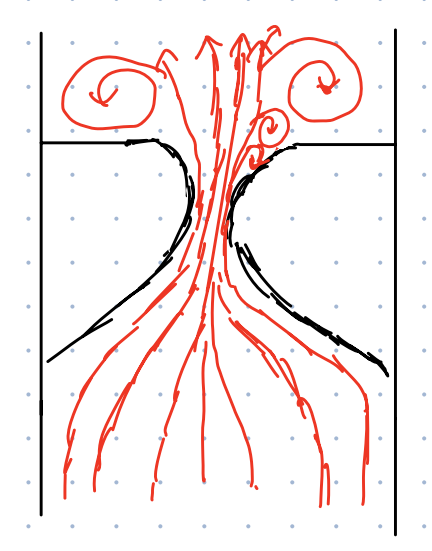

**(3.b) The flow through the Venturi remains steady because the gradual change in cross-sectional area causes smooth acceleration and deceleration of the fluid. This behavior is predictable, as the geometry ensures controlled contraction at the throat and expansion at the outlet. No part of the flow system fluctuates with time, provided the inlet conditions stay constant.

### Step 4: CFD Simulations
(4.a) Run the CFD solver below using the inlet conditions calculated for 0.8 GPM flow rate(having the flow rate and the cross section area, calculate the velocity at the inlet - hint: inlet_velocity = 120 mm/s). Sketch the calculated flow field and write down the average velocity at the Venturi throat.

(4.b) Describe any differences found between the CFD and the visualizations. Was the [flow turbulence](https://en.wikipedia.org/wiki/Turbulence) modeled acurately in the simulation? how about separation points?

In [5]:
# form parameters
#@title CFD Simulation settings: { display-mode: "form" }
simulation_time = 5 #@param {type:"number"}
mesh_refinement = 5 #@param {type:"integer"}
inlet_velocity = 120 #@param {type:"number"}
output_start_time = 0 #@param {type:"number"}
output_time_step =  1 #@param {type:"number"}
gif_animation = "On" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - simulation_time (s): the total simulation time in seconds. a value between 3 to 10 seconds is reasonable. for mesh_refinement values higher than 5 keep the simulation_time low (like 3 to 5 sec) so that the simulation does not take too long to complete.
#@markdown - mesh_refinement (dimentionless): mesh refinement level. for example if this value is set to 5, then each axes is divided to 2^5 = 32 sections and the total number of regions to solve in 2D space would be 32*32=1024.
#@markdown - inlet_velocity (mm/s): the velocity at the inlet.
#@markdown - output_start_time (s): the time from which the solver starts to output the results of the simulation. should be less than the simulation_time otherwise no output is generated.
#@markdown - output_time_step (s): the time step between the output files. Note that the simulation time step is automatically selected according to the flow properties and this time step is only for the output files.
#@markdown - gif_animation: controls wether an animation is generated as a gif file or not.

# import required libraries
from openpiv import lab
import numpy as np
import os, warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
from google.colab import files as fls
from google.colab import output

# setting up some global settings for plots
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.2, 4)
plt.rcParams['figure.dpi'] = 150

# collecting the settings for simulation
stg = {}
stg['ST'] = simulation_time
stg['MR'] = mesh_refinement
stg['IV'] = inlet_velocity
stg['OST'] = output_start_time
stg['ODT'] = output_time_step

# defining the geometry for plots
patches = [Polygon([[-40,-35],[-40,40],[-6.7,40],[-2.5,24.3],[-2.5,10]], closed=True), \
        Polygon([[40,-35],[40,40],[6.7,40],[2.5,24.3],[2.5,10]], closed=True)]
p = PatchCollection(patches, alpha=0.8)

# CFD folder preparation
def StartCFDFolder():
    if os.path.isdir('./CFD'):
        !rm -r ./CFD
    !mkdir ./CFD
    !cp '/content/FlowVisLab/Gerris Files/Venturi/model.gts' ./CFD

# function to show the CFD folder
def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view('/content/CFD')

# running the simulation
StartCFDFolder()
lab.WriteGerrisFile('/content/CFD/run.gfs', stg)
print('running the simulation:')
!cd ./CFD && gerris2D /content/CFD/run.gfs
output.clear()
print('----------------------------------------------------')
print('- Done with simulation.')
times = np.arange(output_start_time,simulation_time+(output_time_step/2.0),output_time_step)
a = np.loadtxt(f'/content/CFD/output_{times[-1]:.3f}.txt', skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
vmin = pressure.min()
vmax = pressure.max()
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SaveCFDanim('/content/CFD', p, vmin=vmin, vmax=vmax)
  print(' - Done with gif')
print('all done')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')


button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)


----------------------------------------------------
- Done with simulation.
creating gif animation...
 - Done with gif
all done
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

Error in callback <function _draw_all_if_interactive at 0x7991efc18cc0> (for post_execute):


KeyboardInterrupt: 

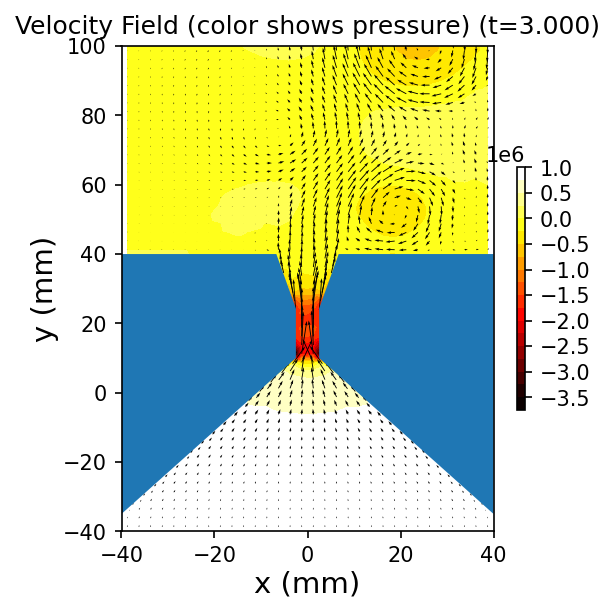

In [8]:
# @title Plot velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
time_percentage = 56 # @param {"type":"slider","min":0,"max":100,"step":1}
# @markdown **Note**:
# @markdown time_percentage is the percentage between output start time and simulation time. 0% corresponds to the start time and 100% corresponds to simulation time.

otp = time_percentage
t_requested = (otp*simulation_time/100.0) + (1-otp/100.0)*output_start_time
t_selected = output_start_time + round((t_requested-output_start_time)/output_time_step) * output_time_step
filename = f'/content/CFD/output_{t_selected:.3f}.txt'

plt.rcParams['figure.figsize'] = (4, 4.2)
plt.rcParams['figure.dpi'] = 150
a = np.loadtxt(filename, skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
fig, ax = plt.subplots()
# x and y axes are changed bc we are rotating the results CCW while plotting
cntr = ax.tricontourf(-y, x, pressure, levels=20, cmap='hot', vmin=vmin, vmax=vmax)
fig.colorbar(cntr, ax=ax, aspect=30, shrink=0.5)
q = ax.quiver(-y, x, -v, u, units='xy', color='k', minlength=0.1, minshaft=1.2)
p = PatchCollection(patches, alpha=1)
ax.add_collection(p)
ax.axis([-40, 40, -40, 100])
ax.set_title(f'Velocity Field (color shows pressure) (t={t_selected:.3f})', size=12)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)



In [ ]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
x_position = 0 #@param {type:"integer"}
y_position = 21 #@param {type:"integer"}
#@markdown Notes:
#@markdown - x_position and y_position are the x and y coordinates of the desired point in mm.

import glob

def find_nearest(x, y, xvalue, yvalue):
    r = x.copy()
    for i in range(len(x)):
        r[i] = (x[i]-xvalue)*(x[i]-xvalue) + (y[i]-yvalue)*(y[i]-yvalue)
    ind = r.argmin()
    return ind

results = sorted(glob.glob('/content/CFD/output_*.txt'))
a= np.loadtxt(results[0], skiprows=1)
x, y = a[:,0] , a[:,1]
ind = find_nearest(x, y, y_position, -1*x_position)
u1 = []
v1 = []
for i in range(len(results)):
    a = np.loadtxt(results[i], skiprows=1)
    u1.append(-a[ind,4])
    v1.append(a[ind,3])

time = np.arange(output_start_time,simulation_time+(output_time_step/2),output_time_step)
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=14)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
_ = plt.ylabel('velocity(mm/s)', size=14, labelpad=2)
#plt.tight_layout()

(4.b) The CFD simulation captured the overall flow behavior quite well. It correctly showed how the jet exiting the throat adheres to one side of the Venturi outlet and how turbulence develops on the left side before the flow exits. It also displayed the expected low-pressure region at the throat, caused by the higher velocity in that section. The only inaccuracy was that the model did not fully reproduce the circular recirculating flow on the left side of the outlet as significantly (velocity vectors were very small compared to right circular flow).

### Step 5: PIV Measurements
(5.a) You took PIV images during the Laboratory for a flow rate of 0.8 GPM. Now upload those images to the approriate folder (FlowVisLab/Images/Venturi) using the side menu on the left. Then Run the PIV analysis below and measure the flow velocity at the throat.

(5.b) Compare the measured velocities from PIV with the velocities derived from the Bernoulli and Continuity equations, and the CFD results. Do these result agree? What is the cause for differences if any? and what can be done to improve them?

**hint:** The combination of high flow velocity at the throat and camera limitations at high speed captures makes it hard to get high quality pictures. If you'r pictures are blurry or too dark, PIV results may not be accurate. You can discuss this and other limitations for each method in your answers.

In [10]:
# form inputs
#@title PIV Analysis Settings: { display-mode: "form" }
window_size = 80 #@param {type:"integer"}
overlap = 40 #@param {type:"integer"}
search_area = 100 #@param {type:"integer"}
scale = 22.6 #@param {type:"number"}
background_removal = "on" #@param ["on", "off"]
bad_vector_replacement = "on" #@param ["on", "off"]
gif_animation = "On" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - region: the insert consists of three different orifices. choose of them for the analysis.
#@markdown - window_size (pixels): the size of each interogation window. a value between 20 to 120 is reasonable.
#@markdown - overlap (pixels): the amount of overlap between each interogation window. should be less than 'window_size'. usually this parameter is set to about half the window_size.
#@markdown - search_area (pixels): the size of the area that is searched to find a match for the interogation window. should be equal or larger than the 'window_size'.
#@markdown - scale (pixel/mm): the scale factor between the image and the physical model.
#@markdown - background_removal: option to remove background and reflections from images before processing. helps to get more accurate results.
#@markdown - bad_vector_replacement: if enabled, the program finds incorrect velocity vectors and replaces them with a vector interpolated from the neighboring vectors.
#@markdown - gif_animation: controls whether an animation is generated as a gif file or not.

# importing required libraries
from openpiv import lab, tools
import os, warnings
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files as fls

# setting up some settings for outputs
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 150

# setting up the process settings
stg = {}
stg['WS'] = window_size
stg['OL'] = overlap
stg['SA'] = search_area
stg['SC'] = scale
stg['BR'] = background_removal
stg['BVR'] = bad_vector_replacement
stg['DT'] = 0.001094 # time between frame_a and frame_b
stg['DP'] = os.path.join('/content/FlowVisLab/Images', 'Venturi') # path to the experiment data
stg['MF'] = [8000,15000]
stg['GF'] = [(-10000,10000),(-1000,20000)]


#sending the settings to base code for processing
bg = lab.ProcessHandler(stg)
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SavePIVanim(stg['DP'], stg['SC'], bg)
print('- all done.')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')

def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view(os.path.join(stg['DP'], 'Analysis'))

button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)


preprocessing:
finding background image...
- done with background for image set A
- done with background for image set B
finding reflections...
- done with reflections
main process:
processing images...
- done processing
creating gif animation...
- all done.
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

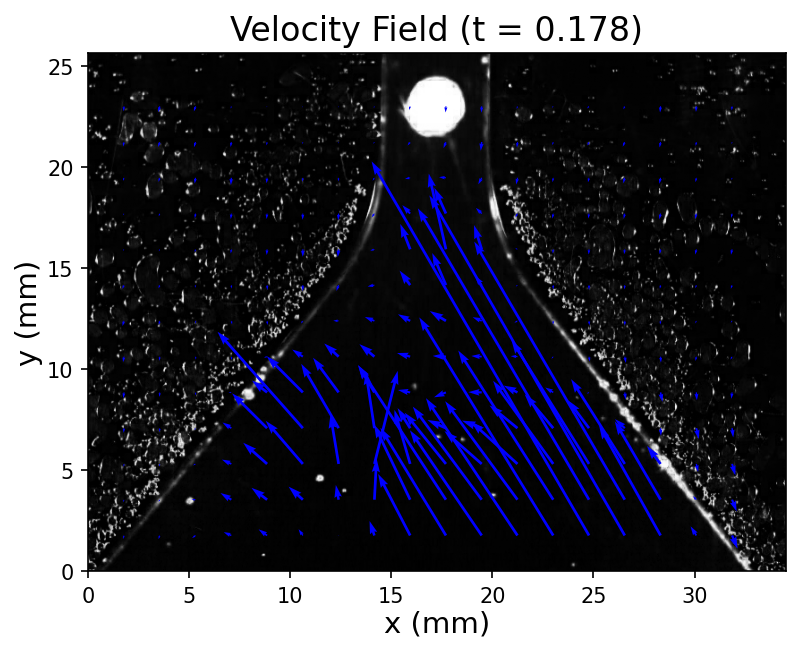

In [11]:
# @title Plot velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"50%"}
time = 0.17832 # @param {"type":"slider","min":0,"max":1.45628,"step":0.02972}

dt = 0.01486
n = round(time/dt)
file = os.path.join(stg['DP'], f'Analysis/frame{n:04d}.dat')
x, y, u, v, _ = tools.read_data(file)
fig, ax = plt.subplots()
ax.imshow(bg, cmap='gray', extent=[0., 780/scale, 0., 580/scale])
ax.quiver(x, y, u, v, color='b', units='xy', minlength=0.1, minshaft=1.2)
ax.set_title(f'Velocity Field (t = {time:.3f})', size=16)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)

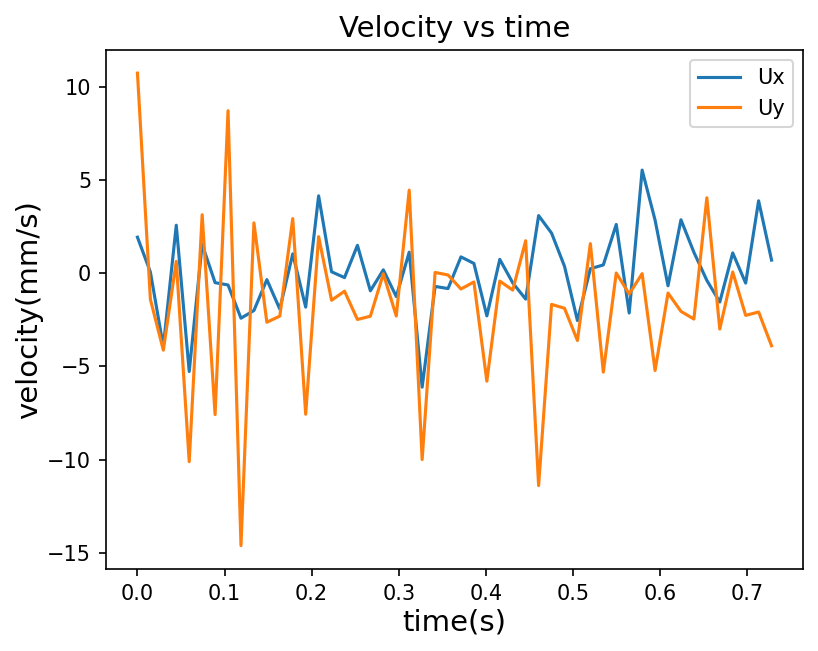

In [12]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
x_position = 17 #@param {type:"integer"}
y_position = 24 #@param {type:"integer"}
#@markdown Notes:

#@markdown x_position and y_position are the x and y coordinates of the desired point in mm.

from openpiv import tools
import glob

results = sorted(glob.glob(f'/content/FlowVisLab/Images/Venturi/Analysis/frame*.dat'))
x, y, *_ = tools.read_data(results[0])
idx = np.abs(x[1,:] - x_position).argmin()
idy = np.abs(y[:,1] - y_position).argmin()
u1 = []
v1 = []
for i in range(len(results)):
    x, y, u, v, mask = tools.read_data(results[i])
    u1.append(u[idy,idx])
    v1.append(v[idy,idx])

time = np.arange(0,50)*dt
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=14)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
_ = plt.ylabel('velocity(mm/s)', size=14, labelpad=2)
#plt.tight_layout()

(3.b)
Using the Bernoulli and continuity equations, the calculated flow velocity at the Venturi throat was approximately 1200 mm/s. This value is significantly lower than the 2000 mm/s predicted by the CFD simulation, but much higher than the roughly 50 mm/s measured from the PIV data. The PIV results are likely unreliable due to poor image contrast and the high flow speed, which made the tracer bubbles difficult to detect. Additionally, excessive light entering through the pressure port appears to have interfered with the PIV analysis, as seen from the scattered and misaligned velocity vectors in that region.

The higher velocity predicted by the CFD model can be explained by its more realistic treatment of the flow. In the simulation, some of the fluid adheres to the throat walls, effectively reducing the flow area and increasing the local velocity. CFD also accounts for pressure gradients and turbulence using the Navier–Stokes equations, which are more comprehensive than the simplified assumptions of Bernoulli’s equation.

To reduce PIV measurement errors, a lower inlet flow rate could be used to slow the flow and make the bubbles easier to track. Adjusting the flash intensity to reduce glare from the pressure probe would also help improve image clarity near the throat.



---

## C) Square Insert
This insert consists of a simple square body. It provides an example of a complex flow field created around a bluff, or non-streamlined body.
A picture is attached below.

**Again, the dimentions are in mm.**

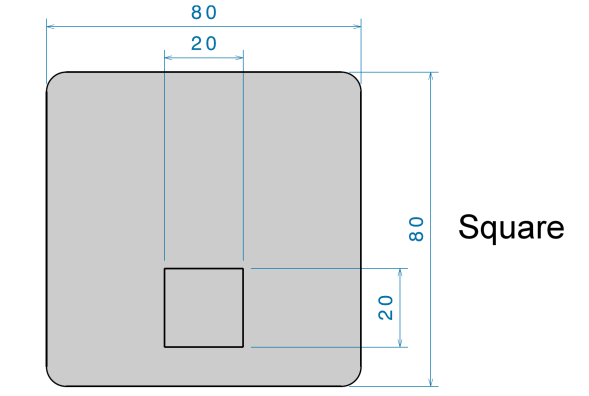

### Step 1: Visualization
(1.a) In the video below, air bubbles were used to make the flow pattern visible. Sketch the flow pattern around the square insert.

(1.b) Comment on the main flow features observable around the entire square insert and highlight these features on your sketch. How do these features vary with flow rate?

In [ ]:
#@title Square insert video {  display-mode: "form" }
from IPython.display import HTML
print('Link to Youtube: https://youtu.be/y5RcfE83xBY')
print('Link to MyMedia: https://play.library.utoronto.ca/69cdf7abd20aadc6d22e56938ca73644 \n')

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/y5RcfE83xBY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

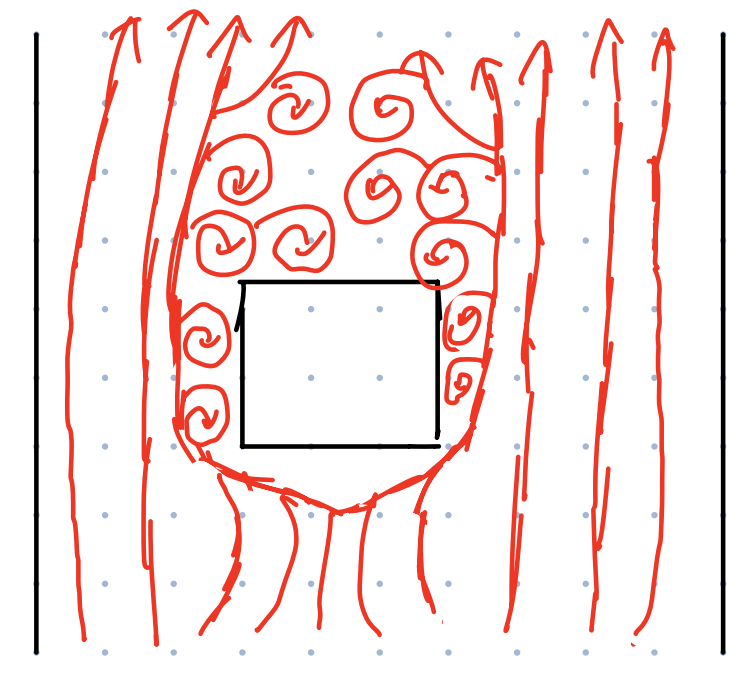

1.b. The main characteristic of the flow around the square piece is the turbulent wake that forms behind it. Just downstream of the square, a low-pressure “vacuum” region causes the flow to separate from the sides, creating a zone of recirculating, circular motion in the wake.

### Step 2: PIV Analysis

(2.a) You took PIV images during the Laboratory for a flow rate of 0.8 GPM. There are two image sets. One focuses on the flow on the side of the square while the other shows the flow behind it ([wake flow](https://en.wikipedia.org/wiki/Wake), [vortex street](https://en.wikipedia.org/wiki/K%C3%A1rm%C3%A1n_vortex_street)). Now upload one of those sets to the approriate folder (FlowVisLab/Images/Square) and then do the PIV analysis. Do the same for the other set as well. Try to locate the maximum and minimum flow velocities around the square.Indicate their locations and approximate values.

**hint:** velocity consists of both x and y-direction components. the volicity hits its' maximum or minimum when the sum of these components reaches the extrema

In [13]:
# form inputs
#@title PIV Analysis Settings: { display-mode: "form" }
region = "Square"
window_size = 70 #@param {type:"integer"}
overlap = 35 #@param {type:"integer"}
search_area = 90 #@param {type:"integer"}
scale = 21.6 #@param {type:"number"}
background_removal = "on" #@param ["on", "off"]
bad_vector_replacement = "on" #@param ["on", "off"]
gif_animation = "On" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - region: there are two image sets, one shows the side and the other shows the flow behind the square. choose one of them for analysis.
#@markdown - window_size (pixels): the size of each interogation window. a value between 20 to 120 is reasonable.
#@markdown - overlap (pixels): the amount of overlap between each interogation window. should be less than 'window_size'. usually this parameter is set to about half the window_size.
#@markdown - search_area (pixels): the size of the area that is searched to find a match for the interogation window. should be equal or larger than the 'window_size'.
#@markdown - scale (pixel/mm): the scale factor between the image and the physical model.
#@markdown - background_removal: option to remove background and reflections from images before processing. helps to get more accurate results.
#@markdown - bad_vector_replacement: if enabled, the program finds incorrect velocity vectors and replaces them with a vector interpolated from the neighboring vectors.
#@markdown - gif_animation: controls whether an animation is generated as a gif file or not.

# importing required libraries
from openpiv import lab, tools
import os, warnings
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files as fls

# setting up some settings for outputs
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 150

# setting up the process settings
stg = {}
stg['WS'] = window_size
stg['OL'] = overlap
stg['SA'] = search_area
stg['SC'] = scale
stg['BR'] = background_removal
stg['BVR'] = bad_vector_replacement
stg['DT'] = 0.003094 # time between frame_a and frame_b
stg['DP'] = os.path.join('/content/FlowVisLab/Images', region) # path to the experiment data
stg['MF'] = [2000, 5000]
stg['GF'] = [(-3000,3000),(-3000,10000)]


#sending the settings to base code for processing
bg = lab.ProcessHandler(stg)
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SavePIVanim(stg['DP'], stg['SC'], bg)
print('- all done.')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')

def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view(os.path.join(stg['DP'], 'Analysis'))

button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)

preprocessing:
finding background image...
- done with background for image set A
- done with background for image set B
finding reflections...
- done with reflections
main process:
processing images...
- done processing
creating gif animation...
- all done.
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

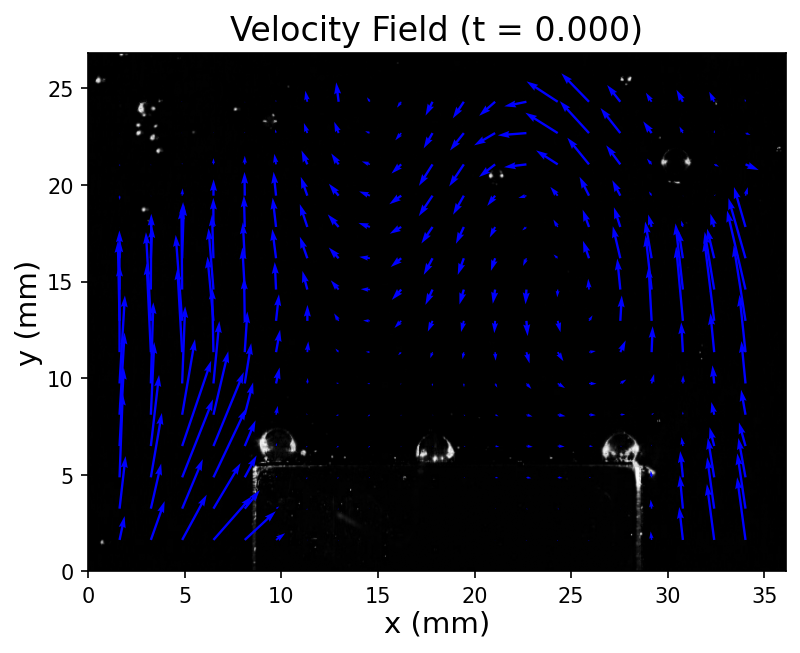

In [14]:
# @title Plot velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"50%"}
time = 0 # @param {"type":"slider","min":0,"max":1.45628,"step":0.02972}

dt = 0.01486
n = round(time/dt)
file = os.path.join(stg['DP'], f'Analysis/frame{n:04d}.dat')
x, y, u, v, _ = tools.read_data(file)
fig, ax = plt.subplots()
ax.imshow(bg, cmap='gray', extent=[0., 780/scale, 0., 580/scale])
ax.quiver(x, y, u, v, color='b', units='xy', minlength=0.1, minshaft=1.2)
ax.set_title(f'Velocity Field (t = {time:.3f})', size=16)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)

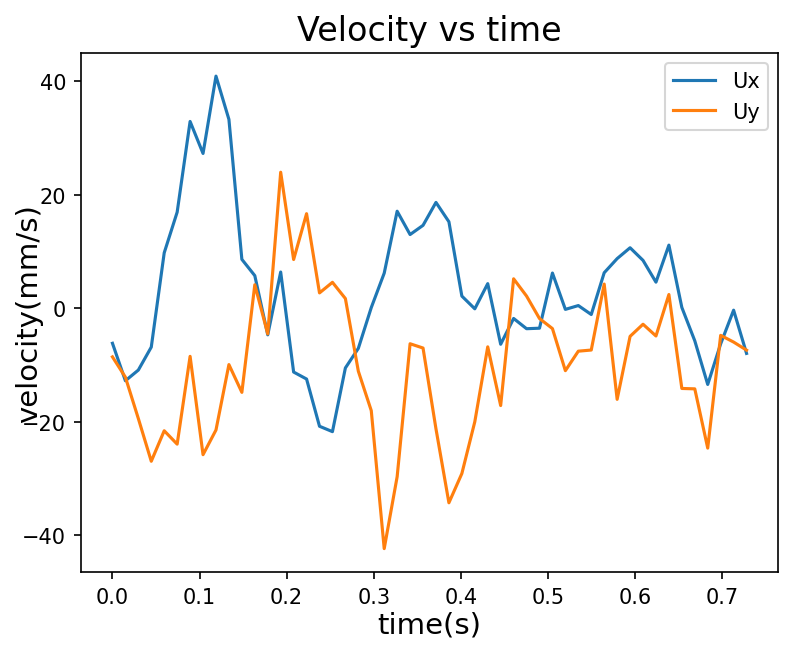

In [15]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
x_position = 17 #@param {type:"integer"}
y_position = 24 #@param {type:"integer"}
#@markdown Notes:

#@markdown x_position and y_position are the x and y coordinates of the desired point in mm.

from openpiv import tools
import glob

dt = 0.01486
results = sorted(glob.glob(f'/content/FlowVisLab/Images/{region}/Analysis/frame*.dat'))
x, y, *_ = tools.read_data(results[0])
idx = np.abs(x[1,:] - x_position).argmin()
idy = np.abs(y[:,1] - y_position).argmin()
u1 = []
v1 = []
for i in range(len(results)):
    x, y, u, v, mask = tools.read_data(results[i])
    u1.append(u[idy,idx])
    v1.append(v[idy,idx])

time = np.arange(0,50)*dt
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=16)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
grabtext = plt.ylabel('velocity(mm/s)', size=14, labelpad=-10)
#plt.tight_layout()

---
(2.a)
From the PIV results of the flow above the square, the region of maximum velocity occurs around x = 17 mm and y = 24 mm, where the flow speed is roughly 30 mm/s. This value was identified from both the velocity vectors in the PIV image and the corresponding velocity–time plot.

On the right side of the square, the area of highest velocity is located near x = 24 mm and y = 17 mm, with an estimated speed of about 185 mm/s.

### Step 3: CFD Simulation

(3.a) Use the CFD solver below to model the flow around the square. Comment on how well does the simulation capture the complex aspects of the flow and indicate the main differences between the visualization (step 1) and the simulation.

(3.b) Run the simulation with the following settings:

- simulation time: 10, mesh_refinement: 5, inlet_velocity: 120,

- output_start_time: 5, output_time_step: 0.05, gif_animation: Off

then use the next cell to plot the velocity at point (x,y)=(-10,20). looking at the velocity plot, what is the frequency at which the Ux and Uy velocities are oscillating? calculate the Strouhal number (st=fD/v), does this value correspond to the one mentioned [here](https://en.wikipedia.org/wiki/Vortex_shedding)?



In [16]:
# form parameters
#@title CFD Simulation settings: { display-mode: "form" }
simulation_time = 10 #@param {type:"number"}
mesh_refinement = 5 #@param {type:"integer"}
inlet_velocity = 120 #@param {type:"number"}
output_start_time = 5 #@param {type:"number"}
output_time_step = 0.05 #@param {type:"number"}
gif_animation = "Off" #@param ["On", "Off"]

#@markdown Notes:
#@markdown - simulation_time (s): the total simulation time in seconds. a value between 3 to 10 seconds is reasonable. for mesh_refinement values higher than 5 keep the simulation_time low (like 3 to 5 sec) so that the simulation does not take too long to complete.
#@markdown - mesh_refinement (dimentionless): mesh refinement level. for example if this value is set to 5, then each axes is divided to 2^5 = 32 sections and the total number of regions to solve in 2D space would be 32*32=1024.
#@markdown - inlet_velocity (mm/s): the velocity at the inlet.
#@markdown - output_start_time (s): the time from which the solver starts to output the results of the simulation. should be less than the simulation_time otherwise no output is generated.
#@markdown - output_time_step (s): the time step between the output files. Note that the simulation time step is automatically selected according to the flow properties and this time step is only for the output files.
#@markdown - gif_animation: controls whether an animation is generated as a gif file or not.

# import required libraries
from openpiv import lab
import numpy as np
import os, warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
from google.colab import files as fls
from google.colab import output

# setting up some global settings for plots
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.2, 4)
plt.rcParams['figure.dpi'] = 150

# collecting the settings for simulation
stg = {}
stg['ST'] = simulation_time
stg['MR'] = mesh_refinement
stg['IV'] = inlet_velocity
stg['OST'] = output_start_time
stg['ODT'] = output_time_step

# defining the geometry for plots
patches = [Polygon([[-10,-10],[-10,10],[10,10],[10,-10]], closed=True)]
p = PatchCollection(patches, alpha=1)

# CFD folder preparation
def StartCFDFolder():
    if os.path.isdir('./CFD'):
        !rm -r ./CFD
    !mkdir ./CFD
    !cp '/content/FlowVisLab/Gerris Files/Square/model.gts' ./CFD

# function to show the CFD folder
def ShowGifFolder(b):
    #fls.download(os.path.join(stg['DP'], 'Analysis/result.gif'))
    fls.view('/content/CFD')

# running the simulation
StartCFDFolder()
lab.WriteGerrisFile('/content/CFD/run.gfs', stg)
print('running the simulation:')
!cd ./CFD && gerris2D /content/CFD/run.gfs
output.clear()
print('----------------------------------------------------')
print('- Done with simulation.')
times = np.arange(output_start_time,simulation_time+(output_time_step/2.0),output_time_step)
a = np.loadtxt(f'/content/CFD/output_{times[-1]:.3f}.txt', skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
vmin = pressure.min()
vmax = pressure.max()
if gif_animation == 'On':
  print('creating gif animation...')
  lab.SaveCFDanim('/content/CFD', p, vmin=vmin, vmax=vmax)
  print('- Done with gif')
print('All done.')
print('You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.')

button = widgets.Button(description="Analysis Folder")
button.on_click(ShowGifFolder)
output = widgets.Output()
display(button, output)


----------------------------------------------------
- Done with simulation.
All done.
You can see the raw output in the analysis folder and use the two code cells below to inspect the results visually.


Button(description='Analysis Folder', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

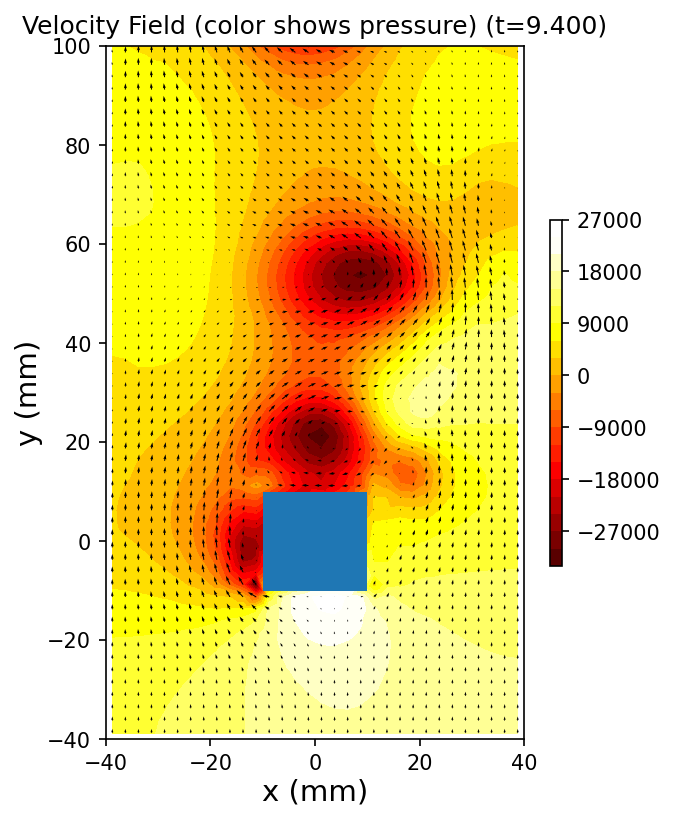

In [19]:
# @title Plot velocity field at a specific time {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
time_percentage = 88 # @param {"type":"slider","min":0,"max":100,"step":1}
# @markdown **Note**:
# @markdown time_percentage is the percentage between output start time and simulation time. 0% corresponds to the start time and 100% corresponds to simulation time.

otp = time_percentage
t_requested = (otp*simulation_time/100.0) + (1-otp/100.0)*output_start_time
t_selected = output_start_time + round((t_requested-output_start_time)/output_time_step) * output_time_step
filename = f'/content/CFD/output_{t_selected:.3f}.txt'

plt.rcParams['figure.figsize'] = (4.5, 6)
plt.rcParams['figure.dpi'] = 150
a = np.loadtxt(filename, skiprows=1)
x, y, u, v, pressure = a[:,0], a[:,1], a[:,3], a[:,4], a[:,5]
fig, ax = plt.subplots()
# x and y axes are changed bc we are rotating the results CCW while plotting
cntr = ax.tricontourf(-y, x, pressure, levels=20, cmap='hot', vmin=vmin, vmax=vmax)
fig.colorbar(cntr, ax=ax, aspect=30, shrink=0.5)
q = ax.quiver(-y, x, -v, u, units='xy', color='k', minlength=0.1, minshaft=1.2)
p = PatchCollection(patches, alpha=1)
ax.add_collection(p)
ax.axis([-40, 40, -40, 100])
ax.set_title(f'Velocity Field (color shows pressure) (t={t_selected:.3f})', size=12)
ax.set_xlabel('x (mm)', size=14, labelpad=2)
_ = ax.set_ylabel('y (mm)', size=14, labelpad=2)

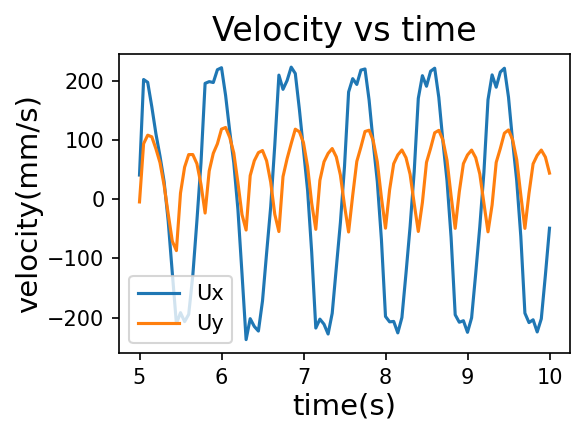

In [20]:
# form inputs
# @title Plot velocity vs time at a specific point: {"run":"auto","vertical-output":true,"form-width":"60%","display-mode":"form"}
x_position =  0#@param {type:"integer"}
y_position = 30 #@param {type:"integer"}
#@markdown Notes:
#@markdown - x_position and y_position are the x and y coordinates of the desired point in mm.

import glob

def find_nearest(x, y, xvalue, yvalue):
    r = x.copy()
    for i in range(len(x)):
        r[i] = (x[i]-xvalue)*(x[i]-xvalue) + (y[i]-yvalue)*(y[i]-yvalue)
    ind = r.argmin()
    return ind

results = sorted(glob.glob('/content/CFD/output_*.txt'))
a= np.loadtxt(results[0], skiprows=1)
x, y = a[:,0] , a[:,1]
ind = find_nearest(x, y, y_position, -1*x_position)
u1 = []
v1 = []
for i in range(len(results)):
    a = np.loadtxt(results[i], skiprows=1)
    u1.append(-a[ind,4])
    v1.append(a[ind,3])

time = np.arange(output_start_time,simulation_time+(output_time_step/2),output_time_step)
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots()
l1, = ax.plot(time, u1)
l2, = ax.plot(time, v1)
ax.set_title('Velocity vs time', size=16)
ax.legend((l1, l2), ('Ux', 'Uy'))
plt.xlabel('time(s)', size=14, labelpad=2)
_ = plt.ylabel('velocity(mm/s)', size=14, labelpad=2)
plt.tight_layout()

(3.a.) The CFD simulation represents the main flow characteristics quite well, especially the formation of the turbulent wake behind the square block. One noticeable difference from the flow visualization, however, is that the CFD results show an asymmetry in the flow on either side of the square, along with an additional region of turbulence farther downstream beyond the main wake.

(3.b), the velocity components were found to oscillate at a frequency of about 1.2 revolutions per second, or 1.2 Hz. The corresponding Strouhal number was calculated to be approximately 0.12, which is fairly close to the typical range reported in literature. The slight deviation from theoretical values is likely due to the CFD model accounting for real fluid effects such as viscosity, flow separation, and local velocity variations—factors that are neglected in the simplified Strouhal relation.

##Congratulations
You've finished the Laboratory.

**Now all is left to do is to select "Print" from the File tab on the top of the page to print the notebook. Please check to see all your answers and images are all included and readable, then upload the pdf file to Quercus.**

Don't worry about the marking, as long as you provide plausible arguments in your answers I'm sure you will get excellent marks. I recomment you take the time to also check the references and extra content provided below. It provides excellent learning material for those of you interested to learn more on this subject.

You can also email me your feedback on how to improve this form in the future : pouya.mohtat@mail.utoronto.ca


##References and extra content:
- In this Laboratory we're using a software called **Gerris** to do our CFD simulations. You can learn more about it here: http://gfs.sourceforge.net
- **Basilisk** is the more advanced newer version of Gerris: http://basilisk.fr
- At first we wanted to do the CFD simulations for this laboratory using **OpenFOAM** which is a well known open-source software for high fidelity CFD simulations. It's more complicated to implement but also more accurate. If you are interested you can check out my other colab notebook showing a simulation of vortex development in a cavity using OpenFOAM: https://colab.research.google.com/drive/1AdWiNh0fQ68qrtYOpoNTkWRuuFvSAn3a?usp=sharing
- We are using **OpenPIV** to carry out our PIV analysis. You can learn more about the software here: http://www.openpiv.net and https://github.com/OpenPIV/openpiv-python
- I have a Github project forked from OpenPIV which adds extra functionality to the code (Spectral, POD and DMD analysis and GUI support). It's still in the early stages of developement but you can take a look anyways: https://github.com/pouya-m/openpiv-python/tree/PIV-Code-Pouya
- In the files menu on the left some extra reading material is provided in the **FlowVisLab/Flow Theory** folder.
- I strongly encourage you to look at the code behind this colab notebook. Specially if you are interested you can checkout the code in the OpenPIV folder to see how we are doing the PIV analysis. If you have trouble understanding any part of the code you can always reach out to me for help.
- if you are interested to learn **Python programming** here is two websites with great content/videos for learning Python: https://realpython.com and https://pythonprogramming.net



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



-----
.

leave this area blank.

-

-

-


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

